In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
import pandas as pd 
df_jl = pd.read_csv('job_listings1.csv')

In [5]:

df_jl['description'] = [BeautifulSoup(description).get_text() for description in df_jl['description'] ]

In [6]:
df_jl.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


In [7]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [8]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df_jl['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df_jl['tokens'] = tokens

In [9]:
df_jl.head()

,Unnamed: 0,description,title,tokens
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""Job, Requirements:\nConceptual, understandi..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"[b'Job, Description\n\nAs, a, Data, Scientist,..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'As, a, Data, Scientist, you, will, be, work..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, -, $6,756, a, monthContractUnder, t..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[b'Location:, USA, \xe2\x80\x93, multiple, loc..."


In [10]:
from sklearn.feature_extraction.text import CountVectorizer


# create the transformer
count = CountVectorizer()

# build vocab
count.fit(df_jl)

# transform text
dtm = count.transform(df_jl)

In [11]:
print(dtm)

  (0, 3)	1
  (1, 0)	1
  (2, 1)	1
  (3, 2)	1


In [12]:
dtm.todense()

matrix([[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]], dtype=int64)

In [13]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=count.get_feature_names())
dtm

,description,title,tokens,unnamed
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0


C:\Users\zebfr\Anaconda3\envs\U4-S1-NLP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


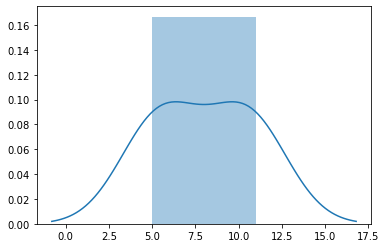

In [14]:
doc_len = [len(doc) for doc in df_jl]

import seaborn as sns

sns.distplot(doc_len);

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df_jl)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,description,title,tokens,unnamed
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0


In [16]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [18]:


# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=1,
                        min_df=.1,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df_jl) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,0,description,title,token,unnamed,unnamed 0
0,0.57735,0.0,0.0,0.0,0.57735,0.57735
1,0.00000,1.0,0.0,0.0,0.00000,0.00000
2,0.00000,0.0,1.0,0.0,0.00000,0.00000
3,0.00000,0.0,0.0,1.0,0.00000,0.00000


In [19]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=4, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=4, p=2, radius=1.0)

In [20]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.41421356, 1.41421356, 1.41421356]]),
 array([[0, 3, 2, 1]], dtype=int64))

In [21]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[2]])

(array([[0.        , 1.41421356, 1.41421356, 1.41421356]]),
 array([[2, 0, 3, 1]], dtype=int64))

In [22]:
text = ["""
Although there is quite a lot of overlap between data scientists and 
data engineers, their roles are not to be confused. A data engineer is 
responsible for making sure that data scientists have all the data 
that we need and that we get it in a timely manner, said Cheng. 
As Vik Paruchuri wrote on DataQuest, 'Data engineers are responsible
for constructing data pipelines and often have to use complex tools
and techniques to handle data at scale. He continued: 
Unlike [data science], data engineering leans a lot more towards 
a software development skill set. Data scientists really depend on 
data engineers, Cheng told Business Insider, because we need the 
data processed, and we need it available in a way that we can get to 
it without waiting hours. So they build tools and process the data in a way 
that allows us to do that.
"""]

In [23]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(text)

In [24]:
new

<1x6 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [25]:
nn.kneighbors(new.todense())

(array([[1., 1., 1., 1.]]), array([[0, 1, 2, 3]], dtype=int64))

In [28]:
df_jl['description'][0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'